In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", rc={'axes.edgecolor':'0.1', 'grid.color':'0.9'})
import pandas as pd
import numpy as np

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Times New Roman",
})

In [104]:
data = {}

In [105]:
df1 = pd.read_csv('ModelSweep-21-06-2024-0103.csv')
data['DSPy (vanilla)'] = df1[df1['Program'].str.match(r'^DSPy$')]
data['MTLLM'] = df1[df1['Program'].str.match('Jac')]
len(data['DSPy (vanilla)'])

1200

In [106]:
df2 = pd.read_csv("ModelSweep-23-06-2024-1352.csv")
# data['DSPy (no retry)'] = df2[df2['Program'].str.match('DSPy_Single_Trial')]
# data['DSPy (compiled)'] = df2[df2['Program'].str.contains('DSPy_Compiled')]

In [107]:
df3 = pd.read_csv("ModelSweep-25-06-2024-2249.csv")
data['DSPy (compiled)'] = df3
len(data['DSPy (compiled)'])

1200

In [108]:
fr_labels = ['DSPy (vanilla)','DSPy (compiled)','MTLLM']
df = pd.concat([data[framework] for framework in fr_labels])
df = df[df["QuestionID"] <=2050]

In [109]:
# df = pd.read_csv("ModelSweep-23-06-2024-1352.csv")
# df = df[~df['Program'].str.contains('DSPy_Compiled')]
# df = df[df["QuestionID"] <=2050]
models = ["gpt-3.5-turbo", "gpt-4", "gpt-4-turbo", "gpt-4o"]

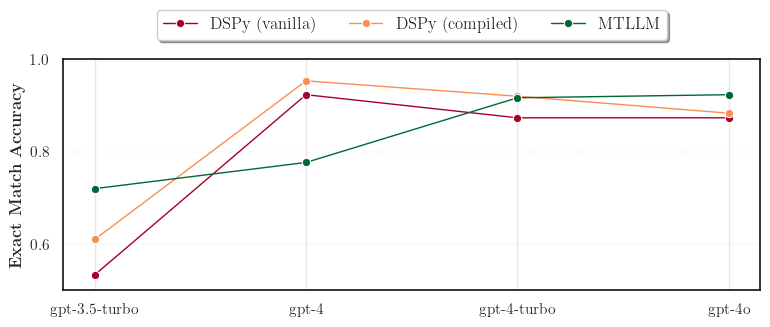

In [110]:
fig, ax = plt.subplots(figsize=(9, 3))
colors = [plt.cm.RdYlGn(0.0), plt.cm.RdYlGn(0.25),plt.cm.RdYlGn(1.0)]
# ax = (df.mean()).plot(kind='bar', figsize=(12, 3), width=0.8, colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14)
# sns.barplot(x="Model", y="ExactMatch",hue="Program", data=df, estimator = np.mean, errorbar=None, width=0.4,palette = colors, ax=ax,edgecolor='black', linewidth=1)
sns.lineplot(errorbar=None,x="Model", y="ExactMatch", hue="Program", data=df, estimator=np.mean, palette=colors, ax=ax, linewidth=1, marker='o')
handles, labels = ax.get_legend_handles_labels()
labels = fr_labels
ax.legend(handles,labels,loc='upper center',shadow=True, fontsize=12, bbox_to_anchor=(0.5, 1.25), ncol=4)
ax.set_xlabel("")
ax.set_ylabel(r"\textbf{Exact Match Accuracy}", fontsize=12)
plt.grid(axis='y',linestyle='--', linewidth=0.35)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
plt.ylim(0.5, 1)
plt.show
plt.savefig('ExactMatchAcccuracy.png', dpi=300, bbox_inches='tight')

<function matplotlib.pyplot.show(close=None, block=None)>

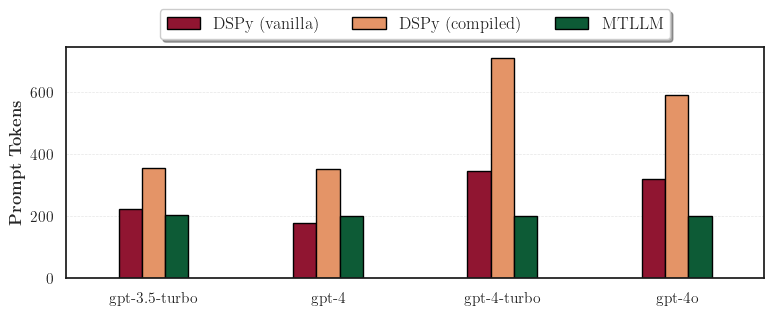

In [111]:
fig, ax = plt.subplots(figsize=(9, 3))
# colors = [plt.cm.RdYlGn(0.0), plt.cm.RdYlGn(0.5), plt.cm.RdYlGn(1.0)]
# ax = (df.mean()).plot(kind='bar', figsize=(12, 3), width=0.8, colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14)
sns.barplot(x="Model", y="PromptTokens", hue="Program", data=df, estimator = np.mean, errorbar=None, width=0.4,palette = colors, ax=ax,edgecolor='black', linewidth=1)
ax.legend(labels,loc='upper center',shadow=True, fontsize=12, bbox_to_anchor=(0.5, 1.2), ncol=4)
ax.set_xlabel("")
ax.set_ylabel(r"\textbf{Prompt Tokens}", fontsize=12)
plt.grid(axis='y',linestyle='--', linewidth=0.5)
# ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
# plt.ylim(0, 1)
plt.savefig('PromptTok.png', dpi=300, bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

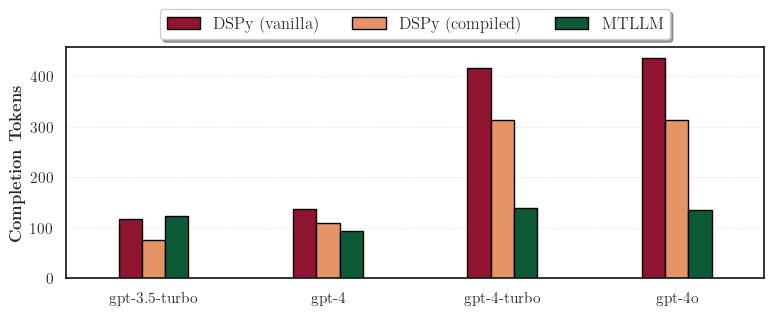

In [112]:
fig, ax = plt.subplots(figsize=(9, 3))
# colors = [plt.cm.RdYlGn(0.0), plt.cm.RdYlGn(0.5), plt.cm.RdYlGn(1.0)]
# ax = (df.mean()).plot(kind='bar', figsize=(12, 3), width=0.8, colormap='RdYlGn', edgecolor='black', linewidth=1.0, fontsize=14)
sns.barplot(x="Model", y="CompletionTokens", hue="Program", data=df, estimator = np.mean, errorbar=None, width=0.4,palette = colors, ax=ax,edgecolor='black', linewidth=1)
ax.legend(labels,loc='upper center',shadow=True, fontsize=12, bbox_to_anchor=(0.5, 1.2), ncol=4)
ax.set_xlabel("")
ax.set_ylabel(r"\textbf{Completion Tokens}", fontsize=12)
plt.grid(axis='y',linestyle='--', linewidth=0.5)
# ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
# plt.ylim(0, 1)
plt.savefig('CompletionTok.png', dpi=300, bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

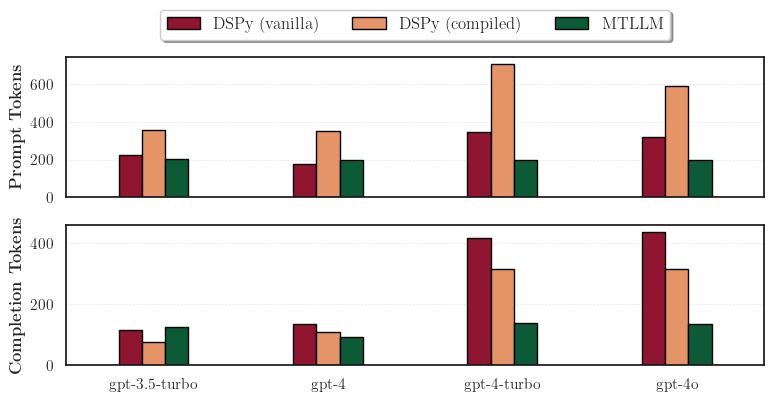

In [113]:
fig, axes = plt.subplots(2,1,figsize=(9, 4))

for i,plot in enumerate(["PromptTokens","CompletionTokens"]):
    # colors = [plt.cm.RdYlGn(0.0), plt.cm.RdYlGn(0.5), plt.cm.RdYlGn(1.0)]
    sns.barplot(x="Model", y=plot, hue="Program", data=df, estimator = np.mean, errorbar=None, width=0.4,palette = colors, ax=axes[i],edgecolor='black', linewidth=1)
    axes[i].set_xlabel("")
    # axes[i].set_ylabel("")
    if plot == "PromptTokens":
        axes[i].set_ylabel(r"\centering\textbf{Prompt Tokens}", fontsize=12)
        axes[i].legend().set_visible(False)
        axes[i].set_xticklabels([])
    else:
        axes[i].set_ylabel(r"\textbf{Completion Tokens}", fontsize=12)
        axes[i].legend(labels,loc='upper center',shadow=True, fontsize=12, bbox_to_anchor=(0.5, 2.6), ncol=4)
    axes[i].grid(axis='y',linestyle='--', linewidth=0.5)
    # ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
    # plt.ylim(0, 400)
    plt.savefig('Token_usage.png', dpi=300, bbox_inches='tight')
plt.show